In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


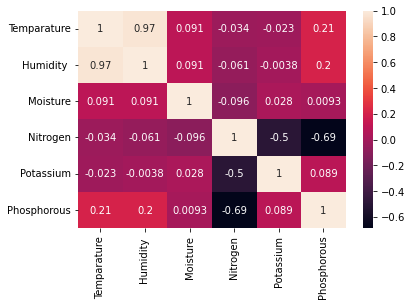

In [7]:
sns.heatmap(data.corr(),annot = True)
plt.show()

In [3]:
y = data.pop('Fertilizer Name')

In [6]:
X = data
cat_mask = (X.dtypes==object)
cat_cols = X.columns[cat_mask].tolist()
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda x:le.fit_transform(x))

In [70]:
X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19
95,30,60,27,3,9,4,17,17
96,38,72,51,2,10,39,0,0
97,36,60,43,4,4,15,0,41


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)

# # Making the Confusion Matrix and Calculating the Accuracy
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# acc4 = accuracy_score(y_test, y_pred)
# # accuracy.append(acc4)
# # model.append('Decision Tree Classification')
# print("Decision Tree Classification's Accuracy :", acc4)

# # Cross validation score
# from sklearn.model_selection import cross_val_score
# score = cross_val_score(classifier, X, y, cv=5)
# print("Cross-Validation Score:", score)

# # Classification Report
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))


In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc5 = accuracy_score(y_test, y_pred)
# accuracy.append(acc5)
# model.append('Random Forest Classification')
print("Random Forest Classification's Accuracy:", acc5)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]
Random Forest Classification's Accuracy: 0.95
Cross-Validation Score: [0.9  0.95 1.   0.95 1.  ]
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



C:\Users\suhas\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhas\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhas\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
import pickle

In [12]:
data = {'fert':classifier,'le':le}
with open('saved_steps_fert.pkl','wb') as file:
    pickle.dump(data,file)

In [13]:
with open('saved_steps_fert.pkl','rb') as file:
    mod = pickle.load(file)

In [76]:
y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object